In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('googleplaystore.csv')
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9737,Hospital ER Emergency Heart Surgery: Doctor Games,FAMILY,3.8,1652,71M,"100,000+",Free,0,Everyone,Simulation,11-Jul-18,10,4.1 and up
1832,Clue,GAME,4.6,19922,35M,"100,000+",Paid,$1.99,Everyone 10+,Board,30-Jul-18,2.2.5,5.0 and up
9659,FAST EO,EVENTS,5.0,1,Varies with device,10+,Free,0,Everyone,Events,15-May-18,1.0.3,4.1 and up
10499,HD Themes Toyota Cruiser 100VX,PERSONALIZATION,NaN,2,16M,100+,Free,0,Teen,Personalization,30-Sep-16,1,2.3.3 and up
2412,abeoCoder,MEDICAL,3.1,83,3.2M,"10,000+",Free,0,Everyone,Medical,30-Jul-18,6.6,4.1 and up


### DATA CLEANING

### 1. Which of the following column(s) has/have null values?

In [3]:
df.isna().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

### 2. Clean the Rating column and the other columns containing null values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


<Axes: ylabel='Frequency'>

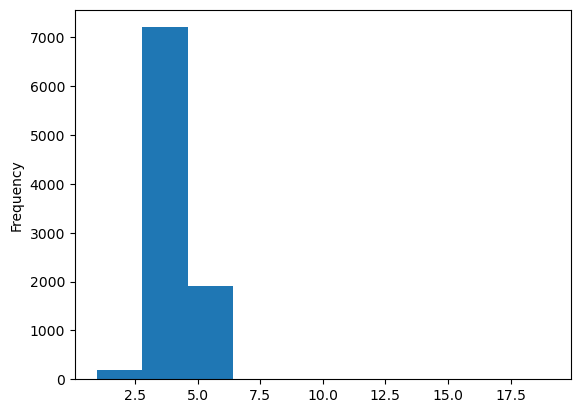

In [5]:
df['Rating'].plot(kind='hist')

<Axes: >

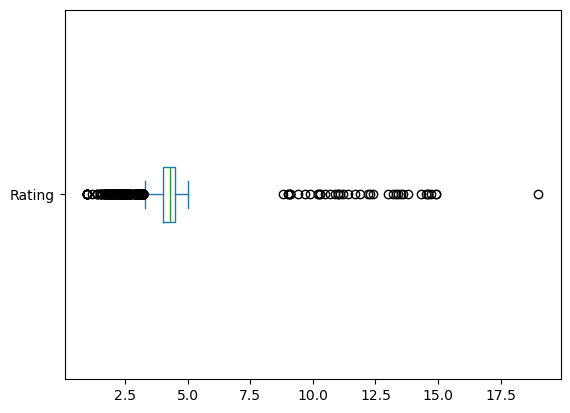

In [6]:
df['Rating'].plot(kind='box', vert=False)

In [7]:
df.loc[df['Rating']>5,'Rating']=np.nan

In [8]:
df.describe()

,Rating
count,9326.000000
mean,4.197727
std,0.508178
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [9]:
df['Rating'].mean()

4.197726785331332

In [10]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

In [11]:
df.dropna(inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10829 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10829 non-null  object 
 1   Category        10829 non-null  object 
 2   Rating          10829 non-null  float64
 3   Reviews         10829 non-null  object 
 4   Size            10829 non-null  object 
 5   Installs        10829 non-null  object 
 6   Type            10829 non-null  object 
 7   Price           10829 non-null  object 
 8   Content Rating  10829 non-null  object 
 9   Genres          10829 non-null  object 
 10  Last Updated    10829 non-null  object 
 11  Current Ver     10829 non-null  object 
 12  Android Ver     10829 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


### 3. Clean the column Reviews and make it numeric

In [13]:
df.loc[df['Reviews'].str.contains('M'), 'Reviews'] = (pd.to_numeric(
    df.loc[df['Reviews'].str.contains('M'), 'Reviews'].str.replace('M', '')) * 1_000_000).astype('str')

df['Reviews'] = pd.to_numeric(df['Reviews'])

In [14]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,Free,Everyone,Art & Design,7-Jan-18,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,15-Jan-18,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,1-Aug-18,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,8-Jun-18,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,20-Jun-18,1.1,4.4 and up


### 4. How many duplicated apps are there?

In [15]:
df.duplicated(subset='App', keep=False).sum()

1979

### 5. Drop duplicated apps keeping only the ones with the greatest number of reviews

In [16]:
df=df.sort_values(by=['App','Reviews'])
df.drop_duplicates(subset='App',keep='last',inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.197727,27.0,3.6M,500+,Free,0,Everyone,Sports,7-Oct-17,0.22,4.1 and up
324,#NAME?,COMICS,3.500000,115.0,9.1M,"10,000+",Free,0,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.500000,40467.0,22M,"1,000,000+",Free,0,Everyone,Social,2-Aug-18,5.03,4.1 and up
4541,.R,TOOLS,4.500000,259.0,203k,"10,000+",Free,0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.700000,573.0,53M,"10,000+",Free,0,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,4.197727,414.0,59M,"100,000+",Free,0,Mature 17+,Video Players & Editors,18-Jul-18,4.0.7,4.0.3 and up
4362,💎 I'm rich,LIFESTYLE,3.800000,718.0,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,11-Mar-18,1.0.0,4.4 and up
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.600000,22098.0,18M,"1,000,000+",Free,0,Everyone,Social,24-Jul-18,4.2.4,4.0.3 and up
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.000000,19.0,3.2M,"10,000+",Free,0,Everyone,Tools,21-Oct-17,1,4.2 and up


### 6. Format the Category column

In [17]:
df['Category'].unique()

array(['SPORTS', 'COMICS', 'SOCIAL', 'TOOLS', 'COMMUNICATION',
       'NEWS_AND_MAGAZINES', 'HEALTH_AND_FITNESS', 'FAMILY',
       'BOOKS_AND_REFERENCE', 'LIFESTYLE', 'BUSINESS', 'SHOPPING',
       'MEDICAL', 'GAME', 'FINANCE', 'PERSONALIZATION', 'PHOTOGRAPHY',
       'TRAVEL_AND_LOCAL', 'DATING', 'PRODUCTIVITY', 'ART_AND_DESIGN',
       'FOOD_AND_DRINK', 'VIDEO_PLAYERS', 'HOUSE_AND_HOME',
       'MAPS_AND_NAVIGATION', 'EVENTS', 'EDUCATION', 'AUTO_AND_VEHICLES',
       'WEATHER', 'BEAUTY', 'ENTERTAINMENT', 'LIBRARIES_AND_DEMO',
       'PARENTING'], dtype=object)

In [18]:
df['Category']=df['Category'].str.replace('_',' ').str.capitalize()
df['Category'].unique()

array(['Sports', 'Comics', 'Social', 'Tools', 'Communication',
       'News and magazines', 'Health and fitness', 'Family',
       'Books and reference', 'Lifestyle', 'Business', 'Shopping',
       'Medical', 'Game', 'Finance', 'Personalization', 'Photography',
       'Travel and local', 'Dating', 'Productivity', 'Art and design',
       'Food and drink', 'Video players', 'House and home',
       'Maps and navigation', 'Events', 'Education', 'Auto and vehicles',
       'Weather', 'Beauty', 'Entertainment', 'Libraries and demo',
       'Parenting'], dtype=object)

### 7. Clean and convert the Installs column to numeric type

In [19]:
df['Installs']=pd.to_numeric(df['Installs'].str.replace('+','').str.replace(',',''))

In [20]:
df['Installs']

8884        500
324       10000
8532    1000000
4541      10000
4636      10000
         ...   
6334     100000
4362      10000
2575    1000000
7559      10000
882     1000000
Name: Installs, Length: 9648, dtype: int64

### 8. Clean and convert the Size column to numeric (representing bytes)

In [21]:
df['Size'].head()

8884    3.6M
324     9.1M
8532     22M
4541    203k
4636     53M
Name: Size, dtype: object

In [22]:
df['Size'] = df['Size'].replace('Varies with device', "0").astype(str)

df.loc[df['Size'].str.contains('M'), 'Size'] = (pd.to_numeric(
    df.loc[df['Size'].str.contains('M'), 'Size'].str.replace('M', '')
) * (1024 * 1024)).astype(str)

df.loc[df['Size'].str.contains('k'), 'Size'] =  (pd.to_numeric(
    df.loc[df['Size'].str.contains('k'), 'Size'].str.replace('k', '')
) * 1024).astype(str)

df['Size'] = pd.to_numeric(df['Size'])

In [23]:
df['Size']

8884     3774873.6
324      9542041.6
8532    23068672.0
4541      207872.0
4636    55574528.0
           ...    
6334    61865984.0
4362    27262976.0
2575    18874368.0
7559     3355443.2
882      4194304.0
Name: Size, Length: 9648, dtype: float64

### 9.Clean and convert the Price column to numeric

In [24]:
df['Price']=pd.to_numeric(df['Price'].str.replace('$','').str.replace('Free','0'))

In [25]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.197727,27.0,3774873.6,500,Free,0.0,Everyone,Sports,7-Oct-17,0.22,4.1 and up
324,#NAME?,Comics,3.500000,115.0,9542041.6,10000,Free,0.0,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up
8532,+Download 4 Instagram Twitter,Social,4.500000,40467.0,23068672.0,1000000,Free,0.0,Everyone,Social,2-Aug-18,5.03,4.1 and up
4541,.R,Tools,4.500000,259.0,207872.0,10000,Free,0.0,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
4636,/u/app,Communication,4.700000,573.0,55574528.0,10000,Free,0.0,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up


## 10. Paid or Free??

In [26]:
df['Distribution']='Free'
df.loc[df ['Price']>0, 'Distribution']='Paid'
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",Sports,4.197727,27.0,3774873.6,500,Free,0.00,Everyone,Sports,7-Oct-17,0.22,4.1 and up,Free
324,#NAME?,Comics,3.500000,115.0,9542041.6,10000,Free,0.00,Mature 17+,Comics,13-Jul-18,5.0.12,5.0 and up,Free
8532,+Download 4 Instagram Twitter,Social,4.500000,40467.0,23068672.0,1000000,Free,0.00,Everyone,Social,2-Aug-18,5.03,4.1 and up,Free
4541,.R,Tools,4.500000,259.0,207872.0,10000,Free,0.00,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up,Free
4636,/u/app,Communication,4.700000,573.0,55574528.0,10000,Free,0.00,Mature 17+,Communication,3-Jul-18,4.2.4,4.1 and up,Free
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",Video players,4.197727,414.0,61865984.0,100000,Free,0.00,Mature 17+,Video Players & Editors,18-Jul-18,4.0.7,4.0.3 and up,Free
4362,💎 I'm rich,Lifestyle,3.800000,718.0,27262976.0,10000,Paid,399.99,Everyone,Lifestyle,11-Mar-18,1.0.0,4.4 and up,Paid
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",Social,4.600000,22098.0,18874368.0,1000000,Free,0.00,Everyone,Social,24-Jul-18,4.2.4,4.0.3 and up,Free
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,Tools,4.000000,19.0,3355443.2,10000,Free,0.00,Everyone,Tools,21-Oct-17,1,4.2 and up,Free


## Analysis

### 11. Which app has the most reviews?

In [27]:
df['Reviews'].max()

78158306.0

In [31]:
df.loc[df['Reviews']==78158306.0, 'App']

2544    Facebook
Name: App, dtype: object

### 12. What category has the highest number of apps uploaded to the store?

In [29]:
df['Category'].value_counts().head()

Category
Family      1874
Game         945
Tools        827
Business     420
Medical      395
Name: count, dtype: int64

### 13. To which category belongs the most expensive app?

In [30]:
df.sort_values(by='Price', ascending=False).head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
4367,I'm Rich - Trump Edition,Lifestyle,3.6,275.0,7654604.8,10000,Paid,400.00,Everyone,Lifestyle,3-May-18,1.0.1,4.1 and up,Paid
5358,I am Rich!,Finance,3.8,93.0,23068672.0,1000,Paid,399.99,Everyone,Finance,11-Dec-17,1,4.1 and up,Paid
5356,I Am Rich Premium,Finance,4.1,1867.0,4928307.2,50000,Paid,399.99,Everyone,Finance,12-Nov-17,1.6,4.0 and up,Paid
5362,I Am Rich Pro,Family,4.4,201.0,2831155.2,5000,Paid,399.99,Everyone,Entertainment,30-May-17,1.54,1.6 and up,Paid
4197,most expensive app (H),Family,4.3,6.0,1572864.0,100,Paid,399.99,Everyone,Entertainment,16-Jul-18,1,7.0 and up,Paid


### 14. What's the name of the most expensive game?

In [71]:
df.loc[df['Category']=='Game'].sort_values('Price',ascending=False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
4203,The World Ends With You,Game,4.6,4108.0,13631488.0,10000,Paid,17.99,Everyone 10+,Arcade,14-Dec-15,1.0.4,4.0 and up,Paid


### 15. Which is the most popular Finance App?

In [63]:
df['Category'].unique()

array(['Sports', 'Comics', 'Social', 'Tools', 'Communication',
       'News and magazines', 'Health and fitness', 'Family',
       'Books and reference', 'Lifestyle', 'Business', 'Shopping',
       'Medical', 'Game', 'Finance', 'Personalization', 'Photography',
       'Travel and local', 'Dating', 'Productivity', 'Art and design',
       'Food and drink', 'Video players', 'House and home',
       'Maps and navigation', 'Events', 'Education', 'Auto and vehicles',
       'Weather', 'Beauty', 'Entertainment', 'Libraries and demo',
       'Parenting'], dtype=object)

In [64]:
df['Installs'].max()

1000000000

In [70]:
df.loc[df['Category']=='Finance'].sort_values('Installs',ascending=False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
5601,Google Pay,Finance,4.2,348132.0,0.0,100000000,Free,0.0,Everyone,Finance,26-Jul-18,2.70.206190089,Varies with device,Free


### 16. What Teen Game has the most reviews?

In [81]:
df.loc[(df['Category']=='Game') & (df['Content Rating']=='Teen')].sort_values('Reviews',ascending=False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
3912,Asphalt 8: Airborne,Game,4.5,8389714.0,96468992.0,100000000,Free,0.0,Teen,Racing,4-Jul-18,3.7.1a,4.0.3 and up,Free


### 17. Which is the free game with the most reviews?

In [88]:
df.loc[(df['Category']=='Game') & (df['Type']=='Free')].sort_values('Reviews',ascending=False).head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Distribution
1879,Clash of Clans,Game,4.6,44893888.0,102760448.0,100000000,Free,0.0,Everyone 10+,Strategy,15-Jul-18,10.322.16,4.1 and up,Free


### 18. How many Tb (tebibytes) were transferred (overall) for the most popular Lifestyle app?

In [85]:
app=df.loc[(df['Category']=='Lifestyle')].sort_values('Installs',ascending=False).iloc[0]
app

App                   Tinder
Category           Lifestyle
Rating                   4.0
Reviews            2789775.0
Size              71303168.0
Installs           100000000
Type                    Free
Price                    0.0
Content Rating    Mature 17+
Genres             Lifestyle
Last Updated        2-Aug-18
Current Ver            9.5.0
Android Ver       4.4 and up
Distribution            Free
Name: 4587, dtype: object

In [86]:
(app['Installs'] * app['Size']) / (1024 * 1024 * 1024 * 1024)

6484.9853515625